<img src="https://upload.wikimedia.org/wikipedia/commons/d/de/Logotipo_Ikiam.png" width=300 height=240 />
<font color='red'> </font>

# EXAMEN PARCIAL PYTHON
    

## GBI6-2022II: BIOINFORMÁTICA

**Campos Chimbo, Micaela Nicol** <font color='red'>CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS</font>

**01-02-2022**

### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```coati.py``` donde tendrá dos funciones:

2. Archivo ```2022II_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una <font color='red'>**tabla**</font> con las características de su computador 


In [2]:
# Características de la computador

In [7]:
###Tabla
import pandas as pd
caracteristicas = pd.DataFrame({'Nombre dispositivo':'DESKTOP-02N9SVN',
                                'Procesador':' Intel(R) Core(TM) i5-3600 CPU @ 2.40GHz   2.50 GHz',
                                'Ram instalada':'8.0 GB',
                                'Identificador de dispositivo': '40AF630B-6B29-4D42-80F3-C58F201E44C6',
                                'Id del producto':'00330-51148-42962-AAOEM',
                                'Tipo de sistema': 'Sistema operativo de 64 bits, procesador basado en x64',
                                'Lapiz y entrada tactil': 'No disponible'}, index= [1])
caracteristicas

,Nombre dispositivo,Procesador,Ram instalada,Identificador de dispositivo,Id del producto,Tipo de sistema,Lapiz y entrada tactil
1,DESKTOP-02N9SVN,Intel(R) Core(TM) i5-3600 CPU @ 2.40GHz 2.5...,8.0 GB,40AF630B-6B29-4D42-80F3-C58F201E44C6,00330-51148-42962-AAOEM,"Sistema operativo de 64 bits, procesador basad...",No disponible


## Ejercicio 1 [1.5 puntos]
Inserte la captura de pantalla del curso [PANDAS](https://www.kaggle.com/learn/pandas) de Kaggle (Certificado y evidencia de avance de la página de Kaggle)
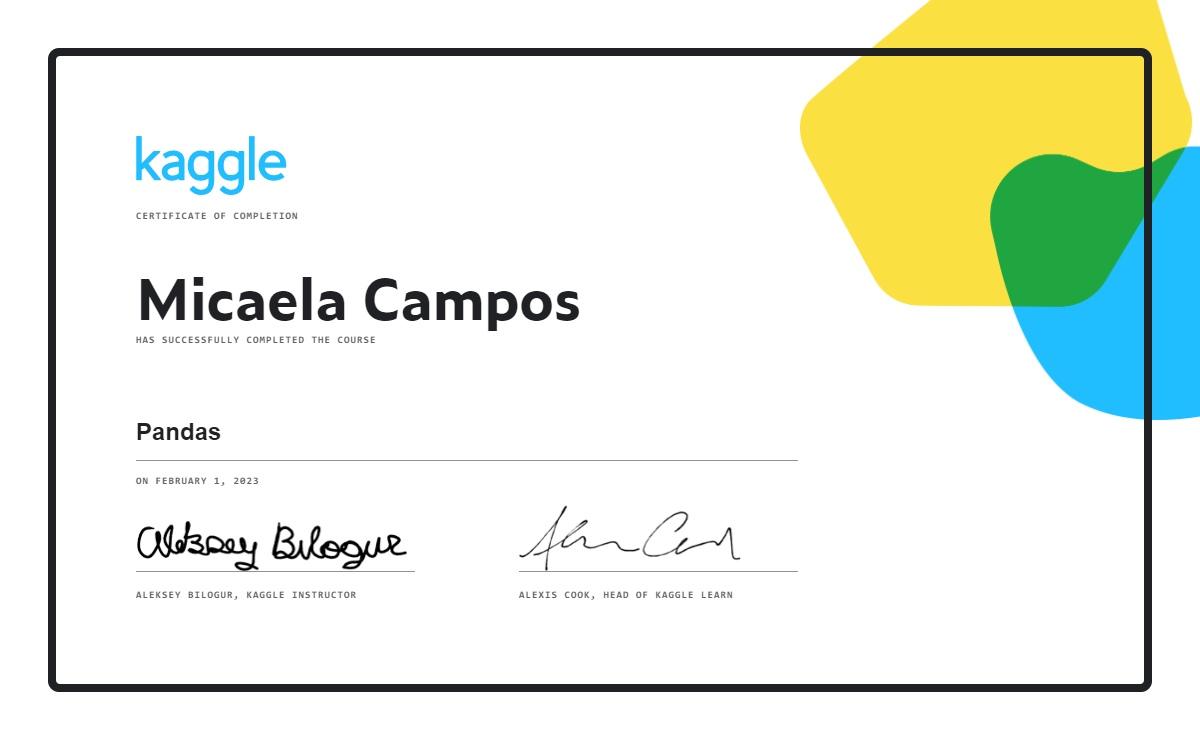

## Ejercicio 2 [1.5 puntos]
Inserte la captura de pantalla del curso [VISUALIZACIÓN](https://www.kaggle.com/learn/data-visualization) de Kaggle (Certificado y evidencia de avance de la página de Kaggle)
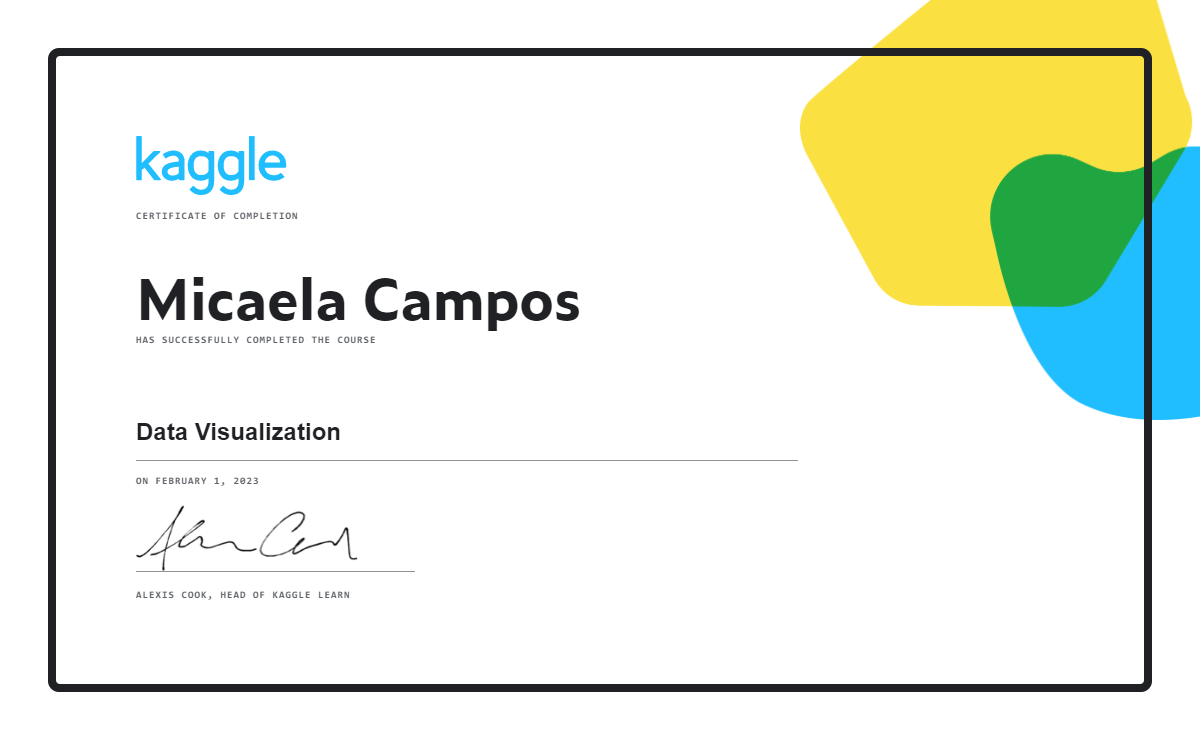

## Ejercicio 3 [3 puntos]

En su carpeta de examen tiene el documento ```id_coati.txt``` donde se encuentran los identificadores de accesión que debe usar para descargar información. 
Cree el módulo ```coati.py``` con las siguientes tres **funciones** y sus respectivos **docstring** :
    
i. ```fasta_downloader```: para cargar ```id_coati.txt``` en ```id_coati```y descargar en **formato genbank** la información correspondiente a los identificadores de accesión usando el **ENTREZ** de Biopythony se guardar en ```coati``` y en ```coati.gb```. 

ii. ```alignment```: para que el algoritmo extraiga **solamente las secuencias** de la variable ```coati``` y realice un alineamiento usando clustalW. El resultado debe ser ```coati.aln``` y ```coati.dnd``` que deben guardarse en su carpeta de trabajo.  

iii ```tree```: para que realice el cálculo de las distancias utilizando ```coati.aln``` y finalmente que imprima en la pantalla el árbol filogenético y guarde en su carpeta de trabajo el arbol como ```coati_phylotree.pdf```

iv. Cargue el módulo ```coati``` e **imprima docstring de cada función**.


In [1]:
# Escriba aquí su código para el ejercicio 3
##### instalar varias aplicaciones
#!pip install biopython
#!pip install reportlab
#!pip install nglview

# Lectura y visualización
from IPython.core.display import Image
from Bio.Seq import Seq
from Bio.SeqUtils import GC

from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

# Filogenia
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Proteómica
from Bio.PDB import *
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import nglview as nv
import ipywidgets

import warnings
warnings.filterwarnings('ignore')

### Primera función creación de la data
def fasta_downloader(id_coati):
    "funcion I con input de IDs del genbank y output que genera los dos documentos .gb y .fasta con los IDs"
    from Bio import Entrez
    in_sequence = open(id_coati, "r")
    out_sequence_gb = open("data/coati.gb", "w")
    out_sequence_fasta = open("data/coati.fasta", "w")
    
    
    for linea in in_sequence:
        Entrez.email = "micaela23campos@gmail.com"
        handle = Entrez.efetch(db = "nucleotide", id = linea, rettype = "gb", retmode = "text")
        data = (handle.read())
        out_sequence_gb.write(data)
    out_sequence_gb.close()
    
    for linea in in_sequence:
        Entrez.email = "micaela23campos@gmail.com"
        handle = Entrez.efetch(db = "nucleotide", id = linea, rettype = "fasta", retmode = "text")
        data = (handle.read())
        out_sequence_fasta.write(data)
    out_sequence_fasta.close()
    
#### Segunda función de Alineamiento de secuencias

def aligment (archivo_fasta):
    "funcion II introduce en input un archivo de secuencias .fasta y genera informacion de alineacion y dendograma de las secuencias"
    from Bio.Align.Applications import ClustalwCommandline
    import os
    from Bio import AlignIO
    from Bio import Phylo
    clustalw_exe = r"C:\Program files (x86)\ClustalW2\clustalw2.exe"
    clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data\coati.fasta")
    assert os.path.isfile(clustalw_exe), "Clustal_w executable is missing or not found"
    stdout, stderr = clustalw_cline()
    print (clustalw_cline)
    ClustalAlign = AlignIO.read("data/coati.aln", "clustal")
    print(ClustalAlign)
    tree = Phylo.read("data/coati.dnd", "newick")
    
    
    
###### Tercera función del Arbol filogenético

def tree (alineacion):
    "funcion III, creacion y grafica del arbol filogenetico del coati"
    from Bio import Phylo 
    from Bio import SeqIO
    from Bio import AlignIO
    from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
    from Bio.Phylo.TreeConstruction import DistanceCalculator
    
    with open (alineacion, "r") as aln:
        alignment = AlignIO.read(aln, "clustal")
        calculator = DistanceCalculator("blosum62")
        distance_matrix = calculator.get_distance(alignment)
        constructor = DistanceTreeConstructor(calculator)
        
    ##ARBOL
    align_total = constructor.build_tree(alignment)
    align_total.rooted = True
    Phylo.write(align_total, "coati.xml", "phyloxml")
    
    ## Librerias para construir el arbol
    import matplotlib
    import matplotlib.pyplot as plt
    
    ### Configuracion de medidas, colores, etc del arbol
    fig = plt.figure(figsize = (30, 40), dpi = 100)
    matplotlib.rc("font", size = 20)
    matplotlib.rc("xtick", labelsize = 20)           
    matplotlib.rc("ytick", labelsize = 20)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(align_total, axes = axes)
                
    # Creacion del archivo coati_phylotree.pdf con el grafico
    fig.savefig("data/coati_phylotree.pdf", dpi = 500 )
    



## Ejercicio 4 [1.5 puntos]

Escriba una o dos líneas de código para usar las funciones ```fasta_downloader```, ```alignment``` y ```tree```: 

i. Descargue la data en ```coati``` y guarde como ```coati.gdb```.  

ii. Alinee las secuencias de ```coati``` y obtenga ```coati.aln``` y ```coati.dnd```.

iii. Construya e **interprete** el arbol filogenético y guarde en ```coati_phylotree.pdf```.

In [2]:
# Escriba aquí su código para el ejercicio 4




## Ejercicio 5 [1.5 puntos]

Con las secuencias de ADN de ```coati```, realice lo siguiente: 

i. la traducción y cálculo del peso molecular (**molecular_weight**) y el índice de estabilidad (**instability_index**) de los péptidos resultantes. 

ii. una gráfica tipo [joinplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) utilizando los parámetros de peso molecular e índice de estabilidad. Edite color, tamaño y tipo de puntos, asimismo etiquete adecuadamente el título y los ejes.

iii. guarde la figura como ```coati.png``` con una resolución de 300dpi.

iv. interprete la figura resultante

In [4]:
# Escriba aquí su código para el ejercicio 5

















## Ejercicio 6 [0.5 puntos]


1. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

2. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
3. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
